<a href="https://colab.research.google.com/github/sadVries/PRA3024/blob/main/GW_BigData_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop


#### Tutorial 1.1: Discovering open data from GW observatories

This notebook describes how to discover what data are available from the [Gravitational-Wave Open Science Center (GWOSC)](https://www.gw-openscience.org).
  

## Software installation  (execute only if running on a cloud platform or haven't done the installation yet!)

First, we need to install the software, which we do following the instruction in [Software Setup Instructions](https://github.com/gw-odw/odw-2021/blob/master/setup.md):

In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwosc==0.5.4'
! pip install pycbc

In [ ]:
#check the version of the package gwosc you are using
import gwosc
print(gwosc.__version__)

0.5.4


## Querying for event information

The module `gwosc.datasets` provides tools for searching for datasets, including events, catalogs and full run strain data releases.


For example, we can search for events in the [GWTC-1 catalog](https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/), the catalog of all events from the O1 and O2 observing runs. A list of available catalogs can be seen in the [Event Portal](https://gw-openscience.org/eventapi)

In [ ]:
from gwosc.datasets import find_datasets
from gwosc import datasets

#-- List all available catalogs
print("List of available catalogs")
print(find_datasets(type="catalog"))
print("")

#-- Print all the GW events from the GWTC-1 catalog
gwtc1 = datasets.find_datasets(type='events', catalog='GWTC-1-confident')
print('GWTC-1 events:', gwtc1)
print("")

List of available catalogs
['GWTC', 'GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'GWTC-2.1-auxiliary', 'GWTC-2.1-confident', 'GWTC-2.1-marginal', 'GWTC-3-confident', 'GWTC-3-marginal', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal']

GWTC-1 events: ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']



In [ ]:
#-- Print all the large strain data sets from LIGO/Virgo observing runs
runs = find_datasets(type='run')
print('Large data sets:', runs)

Large data sets: ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3GK_16KHZ_R1', 'O3GK_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'O3b_16KHZ_R1', 'O3b_4KHZ_R1', 'S5', 'S6']


**Attention**: Note that the most recent observation runs, e.g. O3, are labeled with names containing the name of the run (e.g. O3), the sampling rate (4 or 16 kHz) and the release version (e.g. R1). This means that for O3 you have two labels 'O3a_4KHZ_R1' and 'O3a_16KHZ_R1', depending which is the desired sampling rate.

`datasets.find_datasets` also accepts a `segment` and `detector` keyword to narrow results based on GPS time and detector:

In [ ]:
#-- Detector and segments keywords limit search result
print(datasets.find_datasets(type='events', catalog='GWTC-1-confident', detector="L1", segment=(1164556817, 1187733618)))

['GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


_Note that the name of the events contains also the version of the last release_

Using `gwosc.datasets.event_gps`, we can query for the GPS time of a specific event (it works also without the version number):

In [ ]:
from gwosc.datasets import event_gps
gps = event_gps('GW190425')
print(gps)

1240215503.0


<div class="alert alert-info">All of these times are returned in the GPS time system, which counts the number of seconds that have elapsed since the start of the GPS epoch at midnight (00:00) on January 6th 1980. GWOSC provides a <a href="https://www.gw-openscience.org/gps/">GPS time converter</a> you can use to translate into datetime, or you can use <a href="https://gwpy.github.io/docs/stable/time/"><code>gwpy.time</code></a>.</div>

We can query for the GPS time interval for an observing run:

In [ ]:
from gwosc.datasets import run_segment
print(run_segment('O1'))

(1126051217, 1137254417)


To see only the confident events in O1:

In [ ]:
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
print(O1_events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2']


## Querying for data files

The `gwosc.locate` module provides a function to find the URLs of data files associated with a given dataset.

For event datasets, one can get the list of URLs using only the event name:

In [ ]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW150914')
print(urls)

['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


By default, this function returns all of the files associated with a given event, which isn't particularly helpful. However, we can can filter on any of these by using keyword arguments, for example to get the URL for the 32-second file for the LIGO-Livingston detector:

In [ ]:
urls = get_event_urls('GW150914', duration=32, detector='L1')
print(urls)

['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


# Exercises

Now that you've seen examples of how to query for dataset information using the `gwosc` package, please try and complete the following exercies using that interface:

- How many months did O2 last? (Hint: check the output of _find_datasets(type='run')_ to find the correct label to use)
- How many GWTC-1-confident events were detected during O1?
- What file URL contains data for V1 4096 seconds around GW170817?

In [ ]:

runs = find_datasets(type='run')
runs

['BKGW170608_16KHZ_R1',
 'O1',
 'O1_16KHZ',
 'O2_16KHZ_R1',
 'O2_4KHZ_R1',
 'O3GK_16KHZ_R1',
 'O3GK_4KHZ_R1',
 'O3a_16KHZ_R1',
 'O3a_4KHZ_R1',
 'O3b_16KHZ_R1',
 'O3b_4KHZ_R1',
 'S5',
 'S6']

In [ ]:
print(run_segment('O2_16KHZ_R1'))

(1164556817, 1187733618)


In [ ]:
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
print(O1_events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2']


In [ ]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW170817')
print(urls)

['https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/G-G1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/G-G1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/L-L1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/L-L1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/V-V1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']


In [ ]:

#https://gwosc.org/eventapi/json/GWTC-1-confident/GW170817/v3/V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5


<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop #


#### Tutorial 1.2: Introduction to GWpy

This tutorial will briefly describe GWpy, a python package for gravitational astrophysics, and walk-through how you can use this to speed up access to, and processing of, GWOSC data.
    


## Handling data in the time domain

#### Finding open data

We have seen already that the `gwosc` module can be used to query for what data are available on [GWOSC](https://www.gw-openscience.org/data/).
The next thing to do is to actually read some open data. Let's try to get some for GW190412, the first detection of a gravitational-wave signal from an unequal-mass BBH (binary black hole system).

We can use the [`TimeSeries.fetch_open_data`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.fetch_open_data) method to download data directly from https://www.gw-openscience.org, but we need to know the GPS times.
We can query for the GPS time of an event as follows:

In [ ]:
from gwosc.datasets import event_gps
gps = event_gps('GW190412')
print(gps)

1239082262.1


Now we can build a `[start, end)` GPS segment to 10 seconds around this time, using integers for convenience:

In [ ]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1239082257, 1239082267)


and can now query for the full data.
For this example we choose to retrieve data for the LIGO-Livingston interferometer, using the identifier `'L1'`.
We could have chosen any of

- `'G1`' - GEO600
- `'H1'` - LIGO-Hanford
- `'L1'` - LIGO-Livingston
- `'V1'` - (Advanced) Virgo

In the future, the Japanese observatory KAGRA will come online, with the identifier `'K1'`.

In [ ]:
! pip install -q 'gwpy==3.0.8'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.8 MB/s eta 0:00:00


In [ ]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
type(ldata)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


gwpy.timeseries.timeseries.TimeSeries

##### The `verbose=True` flag lets us see that GWpy has discovered one file that provides the data for the given interval, downloaded it, and loaded the data.
The files are not stored permanently, so next time you do the same call, it will be downloaded again, however, if you know you might repeat the same call many times, you can use `cache=True` to store the file on your computer.

Notes:

* To control the dataset from which your data come from you can use the 'dataset' keyword. It is recommended to use data from a run if they are available, because they contain the most updated version of the calibration. To check which was the run at the time you want to query, it is enough to use the find_datasets method of the package gwosc discussed in the previous tutorial, specifying (type='run',segment=segment). For example, for the segment we are using in this tutorial, the two available datasets are ['O3a_16KHZ_R1', 'O3a_4KHZ_R1']. For the sampling at 4 kHz, the complete command to get data from this dataset is then: _TimeSeries.fetch_open_data('L1', *segment, verbose=True, dataset='O3a_4KHZ_R1')_  

* To read data from a local file instead of from the GWOSC server, we can use [`TimeSeries.read`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.read) method.

We have now downloaded real LIGO data for GW190412! These are the actual data used in the analysis that discovered the first binary black hole merger.

To sanity check things, we can easily make a plot, using the [`plot()`](https://gwpy.github.io/docs/stable/timeseries/plot.html) method of the `data` `TimeSeries`.

Matplotlib documentation can be found [`here`](https://matplotlib.org/contents.html).

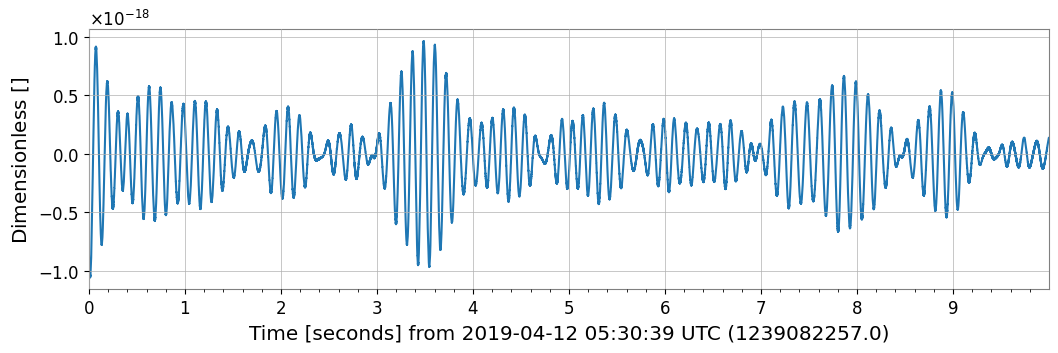

In [ ]:
%matplotlib inline
plot = ldata.plot()

Notes: There are alternative ways to access the GWOSC data.

* [`readligo`](https://losc.ligo.org/s/sample_code/readligo.py) is a light-weight Python module that returns the time series into a Numpy array.
* The [PyCBC](http://github.com/ligo-cbc/pycbc) package has the `pycbc.frame.query_and_read_frame` and `pycbc.frame.read_frame` methods. We use [PyCBC](http://github.com/ligo-cbc/pycbc) in Tutorial 2.1, 2.2.

## Handling data in the frequency domain using the Fourier transform

The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) is a widely-used mathematical tool to expose the frequency-domain content of a time-domain signal, meaning we can see which frequencies contain lots of power, and which have less.

We can calculate the Fourier transform of our `TimeSeries` using the [`fft()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.fft) method:

In [ ]:
fft = ldata.fft()
print(fft)

FrequencySeries([-1.45894410e-21+0.00000000e+00j,
                 -2.91834926e-21-4.52905657e-23j,
                 -2.91973330e-21-9.06202944e-23j, ...,
                 -2.38723982e-23+4.67871178e-26j,
                 -2.38345362e-23+1.80394058e-26j,
                 -2.38457175e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1239082257.0,
                name: Strain,
                channel: None)


The result is a [`FrequencySeries`](https://gwpy.github.io/docs/stable/frequencyseries/), with complex amplitude, representing the amplitude and phase of each frequency in our data.
We can use `abs()` to extract the amplitude and plot that:

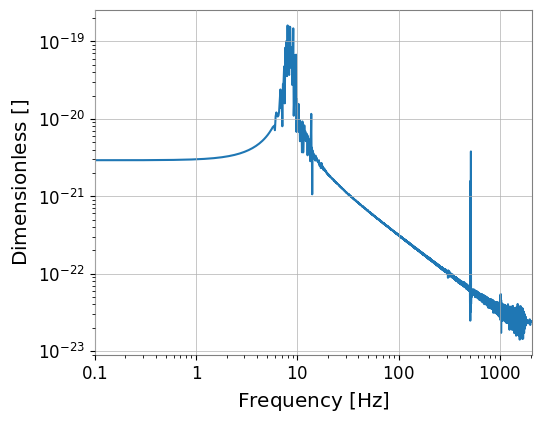

In [ ]:
plot = fft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

This doesn't look correct at all!
The problem is that the FFT works under the assumption that our data are periodic, which means that the edges of our data look like discontinuities when transformed.
We need to apply a window function to our time-domain data before transforming, which we can do using the [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html) module:

In [ ]:
from scipy.signal import get_window
window = get_window('hann', ldata.size)
lwin = ldata * window

Let's try our transform again and see what we get

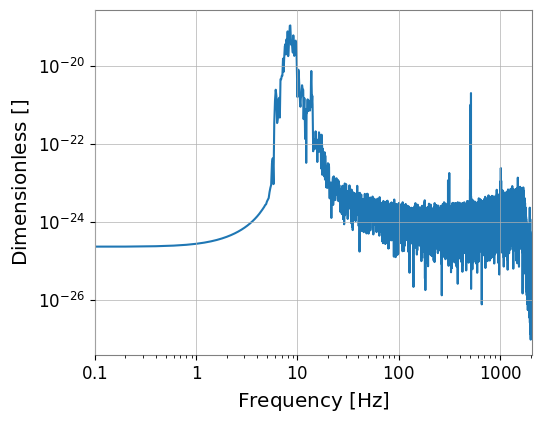

In [ ]:
fftamp = lwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

This looks a little more like what we expect for the amplitude spectral density of a gravitational-wave detector.

## Calculating the power spectral density

In practice, we typically use a large number of FFTs to estimate an average power spectral density over a long period of data.
We can do this using the [`asd()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.asd) method, which uses [Welch's method](https://en.wikipedia.org/wiki/Welch%27s_method) to combine FFTs of overlapping, windowed chunks of data.

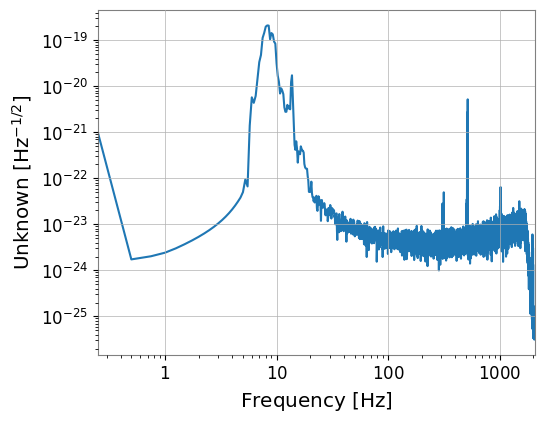

In [ ]:
asd = ldata.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

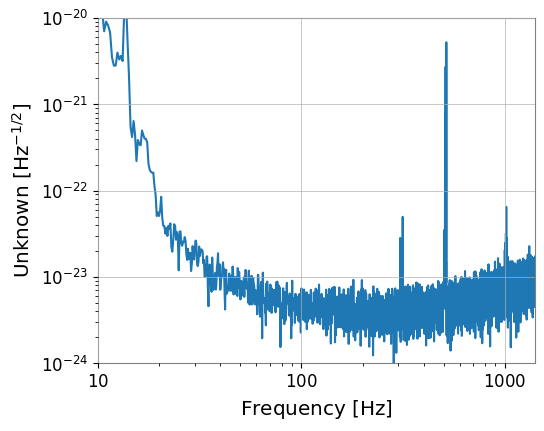

In [ ]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot

The ASD is a standard tool used to study the frequency-domain sensitivity of a gravitational-wave detector.
For the LIGO-Livingston data we loaded, we can see large spikes at certain frequencies, including

- ~300 Hz
- ~500 Hz
- ~1000 Hz

The [O2 spectral lines](https://www.gw-openscience.org/o2speclines/) page on GWOSC describes a number of these spectral features for O2, with some of them being forced upon us, and some being deliberately introduced to help with interferometer control.

Loading more data allows for more FFTs to be averaged during the ASD calculation, meaning random variations get averaged out, and we can see more detail:

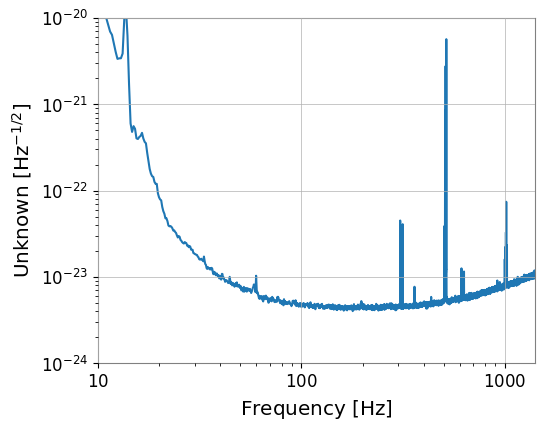

In [ ]:
ldata2 = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
lasd2 = ldata2.asd(fftlength=4, method="median")
plot = lasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)

plot.show(warn=False)

Now we can see some more features, including sets of lines around ~30 Hz and ~65 Hz, and some more isolated lines through the more sensitive region.

For comparison, we can load the LIGO-Hanford data and plot that as well:

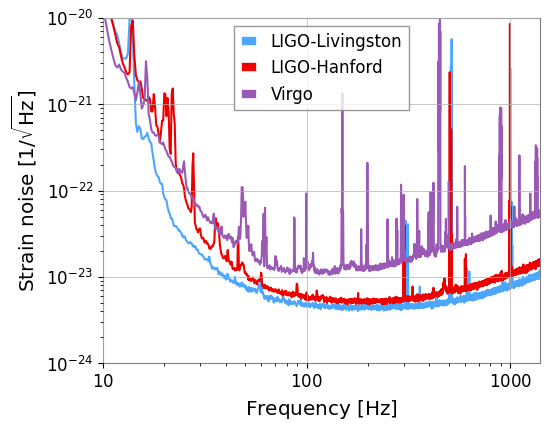

In [ ]:
# get Hanford data
hdata2 = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")

# get Virgo data
vdata2 = TimeSeries.fetch_open_data('V1', int(gps)-512, int(gps)+512, cache=True)
vasd2 = vdata2.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(hasd2, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(vasd2, label='Virgo', color='gwpy:virgo')

# update the Livingston line to use standard colour, and have a label
lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

Now we can see clearly the relative sensitivity of each LIGO instrument, the common features between both, and those unique to each observatory.

##### Quiz Question 1:

The peak amplitude in the LIGO-Livingston data occurs at approximately 5 seconds into the plot above and is undetectable above the background noise by the eye. Plot the data for the LIGO-Hanford detector around GW190412. Looking at your new LIGO-Handford plot, can your eye identify a signal peak?

Fetched 1 URLs from gwosc.org for [1239082257 .. 1239082267))
Reading data... [Done]


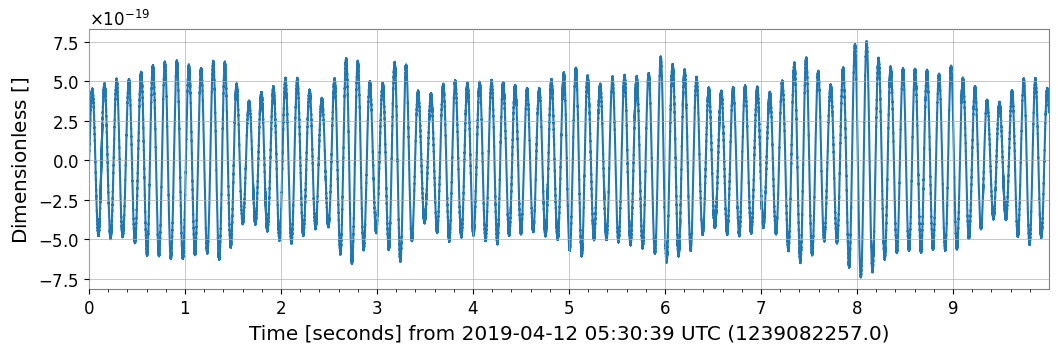

In [ ]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)

plot = hdata.plot()

<img style="float: left;padding: 1.3em" src="https://raw.githubusercontent.com/gw-odw/odw-2020/master/share/ligo_virgo_transparent_crop_small.png">  

#  Gravitational Wave Open Data Workshop #


#### Tutorial 1.3: Data representations in GWpy

This notebook covers some different ways of representing data, including

  - the spectrogram
  - the Q-transform

with a challenge you can explore for each method.
    


##  Installation  (execute only if running on a cloud platform, like Google Colab, or if you haven't done the installation already!)

Note: we use [`pip`](https://docs.python.org/3.6/installing/), but **it is recommended** to use [conda](https://docs.ligo.org/lscsoft/conda/) on your own machine, as explained in the [installation instructions](https://github.com/gw-odw/odw-2021/blob/master/setup.md). This usage might look a little different than normal, simply because we want to do this directly from the notebook.

## Showing the time-evolution of FFTs

The FFT, and the ASD, show us a snapshot of the frequency-domain content of our signal, referred to a single time interval.
It is commonly useful to show how this frequency-domain content evolves over time.

For this we use spectrograms, which show the FFT (or ASD) at each time step on a time-frequency representation.
The `TimeSeries` in GWpy includes two methods for this:

- [`spectrogram()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.spectrogram) - which includses a `stride` parameter, and shows an averaged ASD every time interval corresponding to each stride, and
- [`spectrogram2()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.spectrogram2) - shows a single-FFT ASD, defined by its `fftlength`, at each time step. These FFTs can include overlapping segments of tdata, as specified by the `overlap` parameter.

Which one should I use? The short answer is use `spectrogram2()` for short(ish) chunks of data, less than a minute or so, and `spectrogram()` for longer chunks where the averaging helps remove very short noise bursts.

The long answer is that averaging the FFTs comuted each stride of data reduces the variance of the resulting ASD estimate. However, these averages also reduce the time resolution of the corresponding spectrogram, which is no more `fftlength` $-$ `overlap` but is now determined by the duration of the `stride`. This is called [Welch's spectral density estimation method](https://en.wikipedia.org/wiki/Welch%27s_method).
The choice of the overalp is instead determined by how independent we want our FFTs to be (no overlap) and how dense we want them to be (`overlap` equals to a large fraction of `fftlegth`). Refer to this [GWpy example](https://gwpy.github.io/docs/stable/examples/spectrogram/spectrogram2.html) on an over-dense spectrogam of GW150914.

First, let's reload our data:

In [ ]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
print("GW170817 GPS:", gps)

ldata = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
print("GW170817 data")
print(ldata)

GW170817 GPS: 1187008882.4
GW170817 data
TimeSeries([2.06056010e-20, 1.59181918e-20, 2.18438811e-20, ...,
            1.25504332e-19, 1.23976846e-19, 1.22231459e-19]
           unit: dimensionless,
           t0: 1187008370.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


Now, we can generate our spectrogram using a specific FFT length (remembering to use a window):

<div class="alert alert-info">
Each of these methods returns the output as stacked power spectral densities, so we take the square root to get back to a familiar amplitude spectral density
</div>

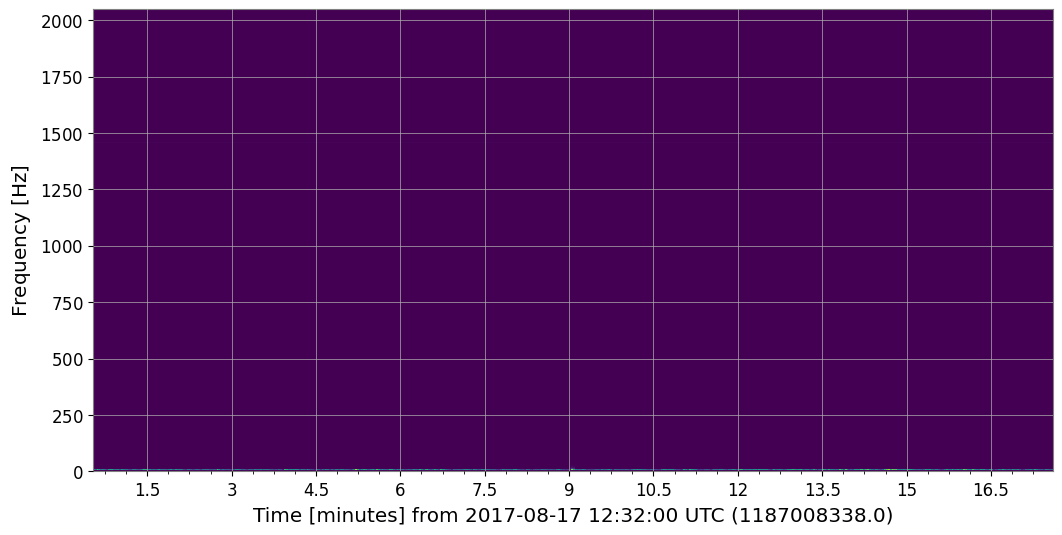

In [ ]:
specgram = ldata.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

Hmmm... something's not right. Can you spot the only "hot" point in this colormap? Maybe the default scale of the color axis is not suitable to fit the excursion of values in this map. **Pro Tip**: check `specgram.min()` and `specgram.max()` values to see if the previous guess is right or not.

We can fix this by passing a few more arguments to our plot to control the display (especially the colouring):

In [ ]:
specgram.min()

<Quantity 5.07939333e-27 1 / Hz(1/2)>

In [ ]:
specgram.max()

<Quantity 1.83162069e-19 1 / Hz(1/2)>

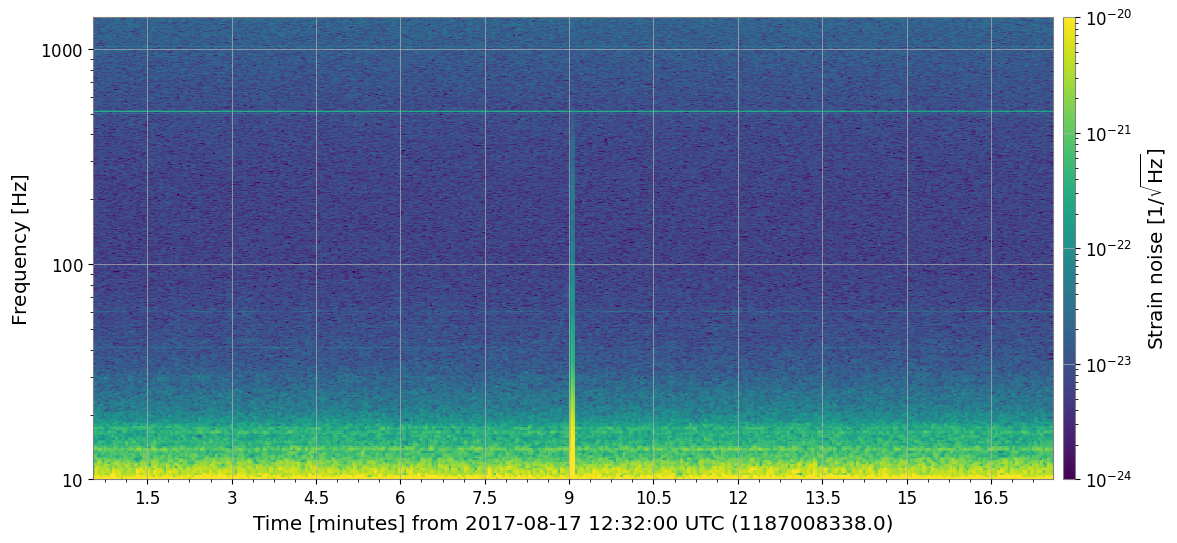

In [ ]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

Here we can see how the ASD for LIGO-Livingston evolves over a ~17 minute span around GW170817. Four order of magnitudes in the ASD intensity are involved, and this is way the previous attempt resulted in a (almost) fully dark blue image.

We can see that the low-frequency noise (<30 Hz) rumbles along with some variation, but high frequencies (>100 Hz) are relatively stable. Between 30-100 Hz we can see some narrow features appearing and disappearing as non-stationary noise affects the measurement.

## Spectrogram challenge!

- download the data for all three detectors involved with the GW170814 detection, generate a PSD for each, and make a plot
- make a spectrogram of data for 10 minutes around the GW170817 detection for the LIGO-Livingston detector

In [ ]:
gps = event_gps('GW170814')
print("GW170814 GPS:", gps)

ldata = TimeSeries.fetch_open_data('L1', int(gps)-32, int(gps)+2, cache=True)
print("GW170814 data")
print(ldata)

GW170814 GPS: 1186741861.5
GW170814 data
TimeSeries([ 8.98701688e-20,  8.04967250e-20,  8.17639082e-20,
            ..., -1.16449869e-19, -1.13720093e-19,
            -1.04192008e-19]
           unit: dimensionless,
           t0: 1186741829.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


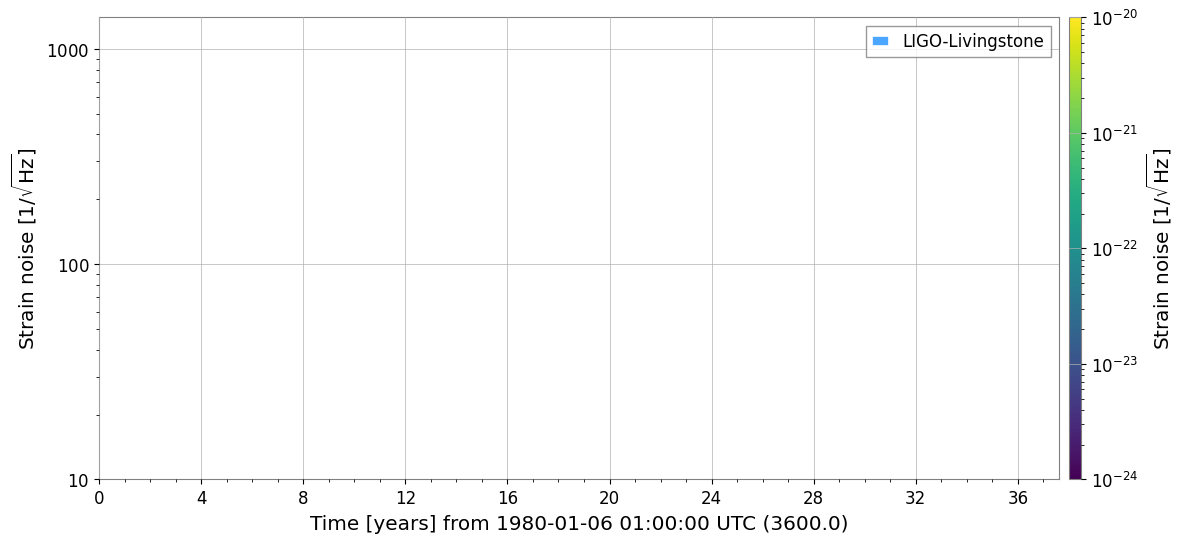

In [ ]:
lasd = ldata.asd(fftlength = 4, method="median")
# and plot using standard colours
ax.plot(lasd, label='LIGO-Livingstone', color='gwpy:ligo-livingston')

# update the Livingston line to use standard colour, and have a label
lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

## Q-transforms in GWpy

The spectrogram above is a useful way to show the variation of a power spectral density (PSD) estimate over time. It's best used to see general trends in how the sensitivity of the GW detectors is changing over longish periods (minutes or hours).

In this section, we will see how we can use a special filter called a Q-transform to create a time-frequency representation of our data that allows use to pick out features at different frequencies, and how they evolve over very short times, without much prior knowledge of the signal morphology.

See [this article](https://doi.org/10.1088/0264-9381/21/20/024) for more details on the Q-transform and its application to gravitational-wave data.

First, lets reload some data from LIGO Hanford around GW170817:

In [ ]:
gps = event_gps('GW170817')

In [ ]:
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


We can now use the `q_transform()` method of the `hdata` `TimeSeries` to create our time-frequency representation (as a [spectrogram](https://gwpy.github.io/docs/stable/spectrogram/)).

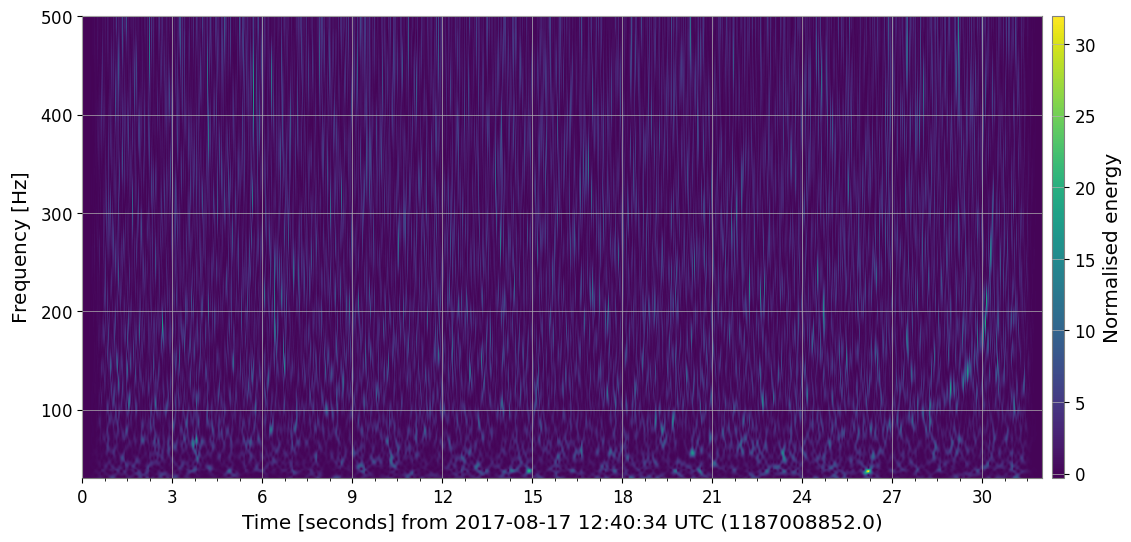

In [ ]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

From this we can see a different representation of the data. Because the Q-transform returns (by default) normalised energy, the low-frequency rumbling is now much less obvious, and we can see better some noises at higher frequencies.

But, we can clean up the display to better visualise the data:

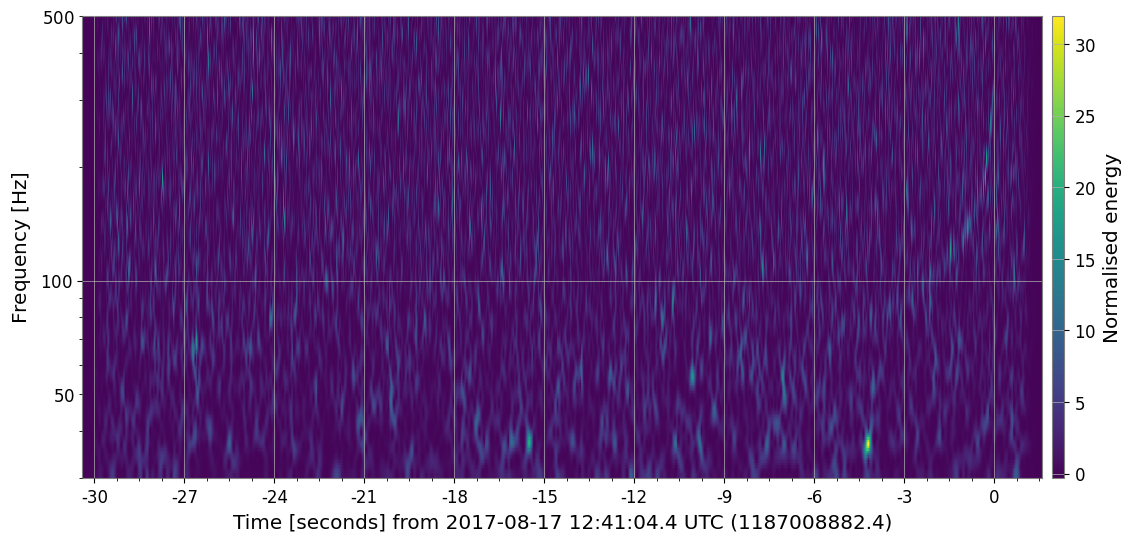

In [ ]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  # refresh

Now we can see a more prominent feature starting at ~-6 seconds that looks a little familiar.
Here we can use our knowledge of the Q-transform, and our hunch about the origin of the 'feature' to choose a more specific range of 'Q' for the Q-transform, so as to better resolve the feature:

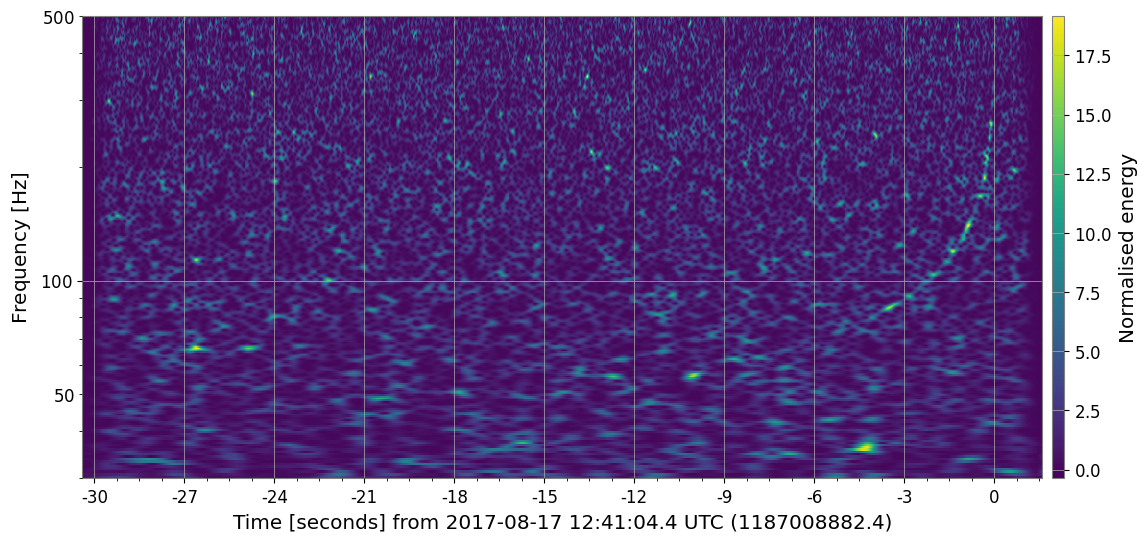

In [ ]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Now we see the beautiful, clear track of a BNS merger, visible from about -4 seconds (maye -10 if you squint), all the way through to the merger at T=0.

HINT: We can also use the `outseg` option to zoom in around the merger:

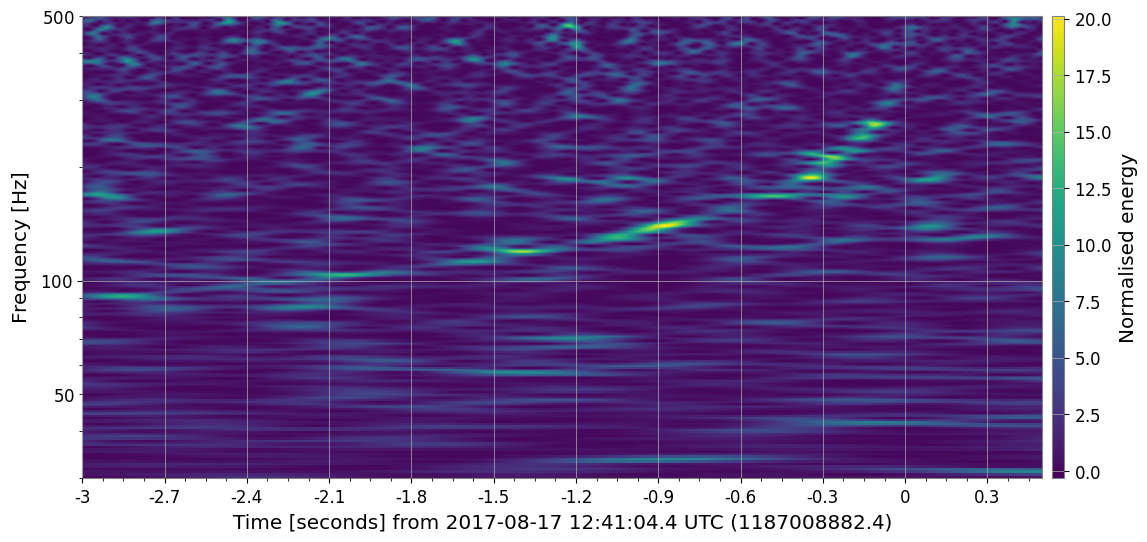

In [ ]:
#-- Use OUTSEG for small time range
hq2 = hdata.q_transform(frange=(30, 500), qrange=(80, 110), outseg=(gps-3,gps+0.5))
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

We can repeat the exercise using LIGO-Livingston data to see something even more remarkable.
First we download and filter the Livingston data:

In [ ]:
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008852 .. 1187008884))
Reading data... [Done]


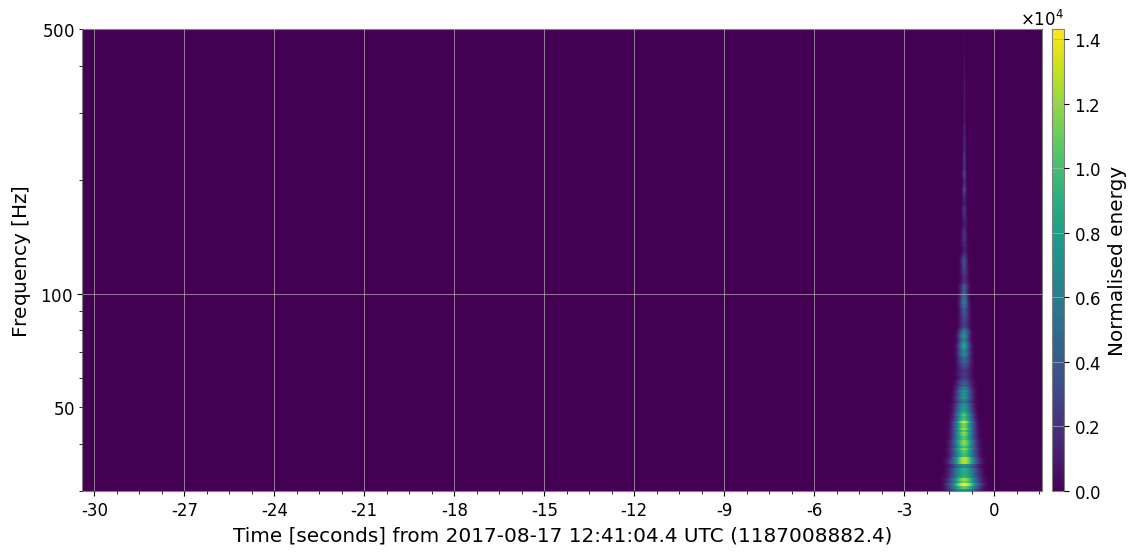

In [ ]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Now we can see a large blob of energy that is 1000 times louder than what we see in the LIGO-Hanford data.
As luck would have it, an instrumental glitch almost exactly overlaps the BNS signal in LIGO-Livingston.
But, we can rescale things to see the astrophyscal signal better:

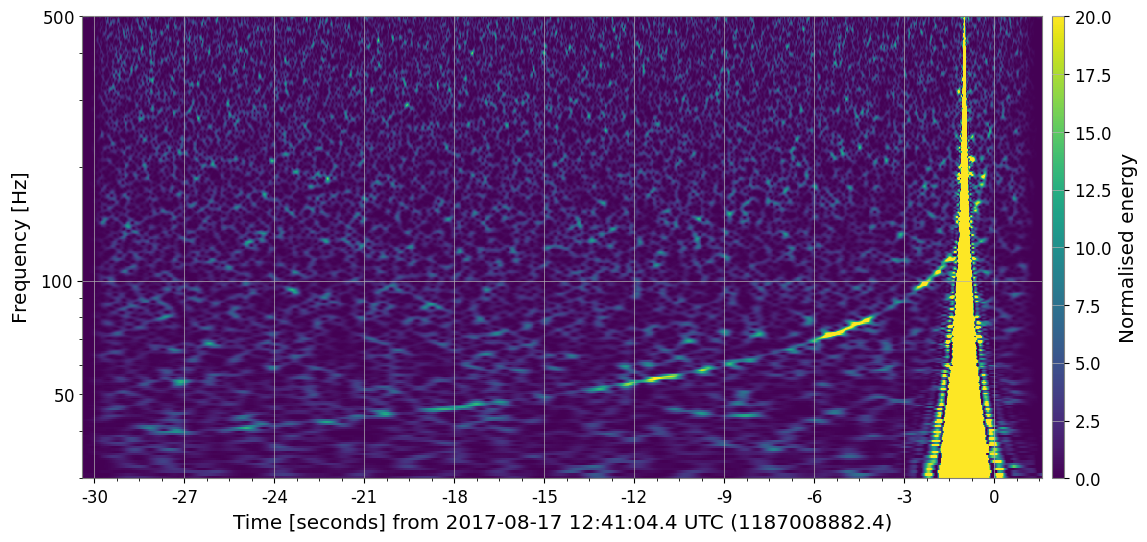

In [ ]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

## Q-scan challenge!

- download the data for all detectors involved with the GW170814 detection. Which detectors registered this event?
- generate a Q-scan for the data in each detector. (Hint: try using a much smaller time range and Q-range than you did for GW170817)

<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop #4


#### Tutorial 1.4: Generating Waveforms

This tutorial shows how to numerically obtain the gravitational waveform radiated during a compact binary coalescence, assuming the basic parameters of the binary are known.

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which provides an easy-to-use Python interface to obtain such waveforms. PyCBC can more generally be used to analyze or simulate gravitational-wave data, find or simulate astrophysical signals from compact binary mergers, and study their parameters. It is one of the tools routinely used by groups within and outside of the LIGO and Virgo collaborations. Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html).



##  Installation  (execute only if running on a cloud platform or if you haven't done the installation already!)

PyCBC is installable through pip. It relies on portions of the [LALSuite]() C-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip. **It is recommended** to use [conda](https://docs.ligo.org/lscsoft/conda/) on your own machine, as explained in the [installation instructions](https://github.com/gw-odw/odw-2019/blob/master/setup.md). This usage might look a little different than normal, simply because we want to do this directly from the notebook.

In [ ]:
! pip install -q pycbc

## Initialization

In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

### Generate your first waveform!

Here we'll generate the gravitational waveform using one of the available waveform approximants. The waveform can be generated as a time series using [`get_td_waveform()`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to use. A variety of approximants are available that include different physical effects.

In this example, we've chosen to use the 'SEOBNRv4_opt' approximant. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1611.03703.pdf). It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (aligned spin).

There are many other models available, with different methodologies employed and physical effects modelled. A full review of the models is outside of the scope of this tutorial.

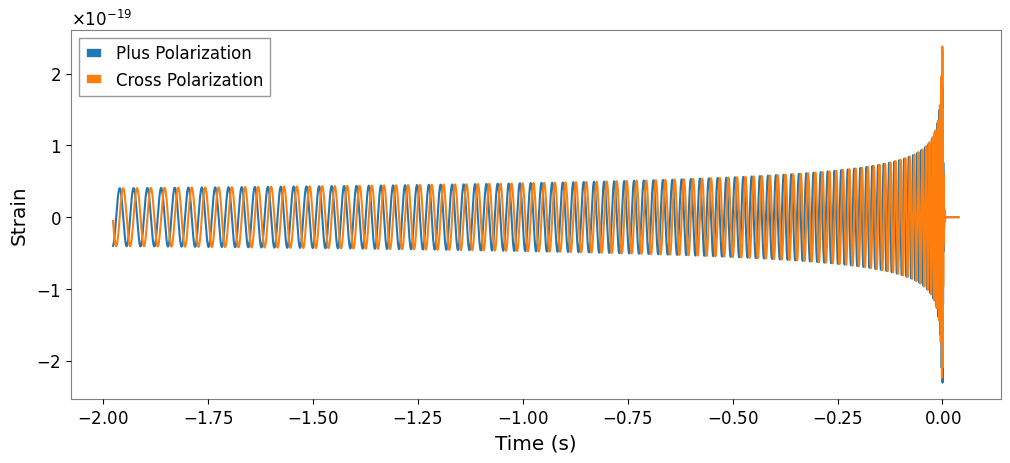

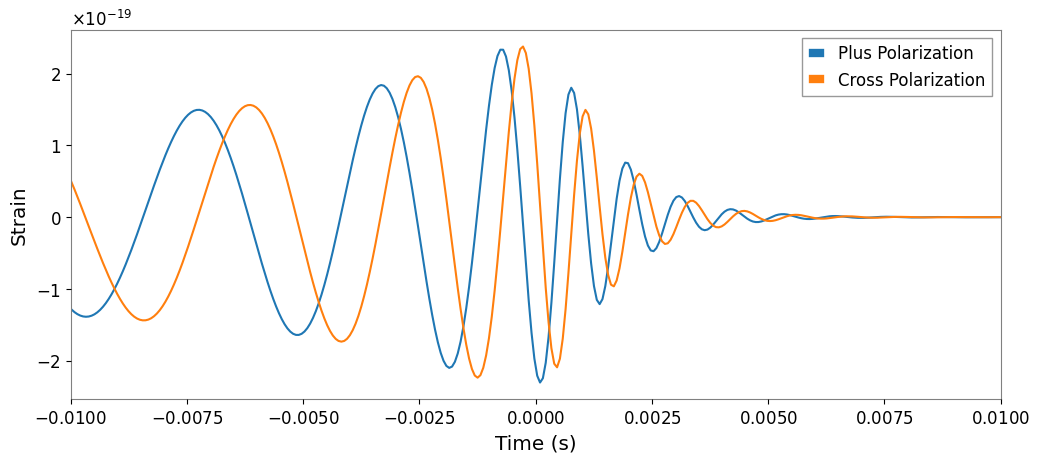

In [ ]:
# The outputs of this function are the "plus" and "cross" polarizations
# of the gravitational-wave signal as viewed from the line of sight at
# a given source inclination (assumed face-on, i.e. zero inclination
# if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

We can see that in the this case, the two polarizations differ only by the phase of the signal. This is a known property of the signal, when the orbital plane of the binary does not precess (i.e. the individual black holes spins are aligned with the orbital angular momentum). In the zoom-in plot, we can see the merger itself and the ringdown that follows.

### How does the waveform change with the mass of the binary?

Below you can see how the length of the waveform increases for lower-mass binary mergers.

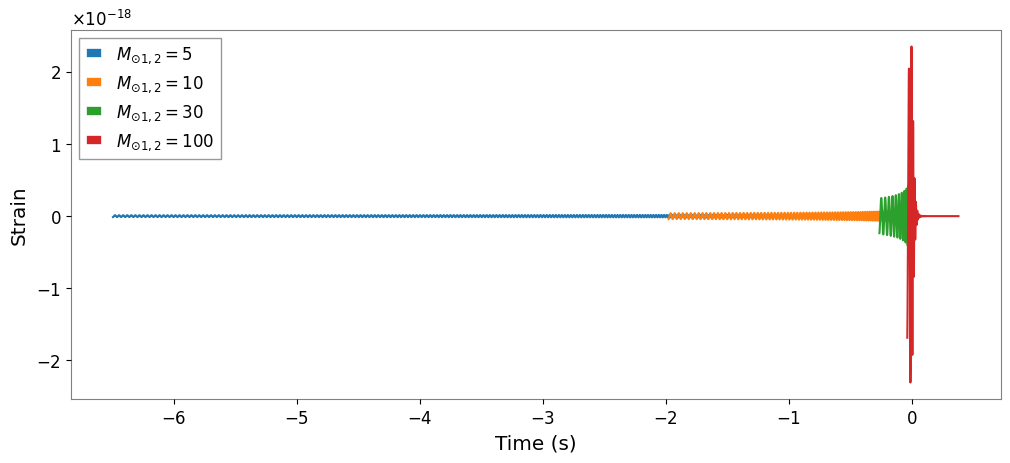

In [ ]:
# Component mass of each binary component. We'll simplify here and assume that each
# component of the binary has the same mass. Again, units are in solar masses.
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)

    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

### Changing the distance of the waveform

The luminosity distance of the source is also a parameter when you generate a waveform. The units used are Megaparsecs (i.e. $10^6\mathrm{\,pc}$). Keep in mind that no redshift effects are taken into account here, so there is a simple linear relationship between distance and amplitude.

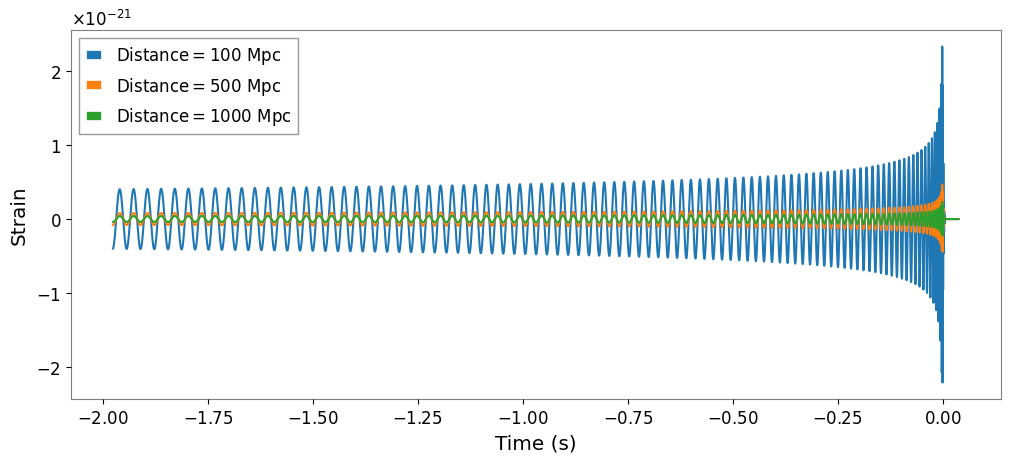

In [ ]:
pylab.figure(figsize=pylab.figaspect(0.4))
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)

    pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

### Exercise

Generate and plot the waveform associated to the binary neutron star merger GW170817. Look up the [GWTC-1](https://www.gw-openscience.org/GWTC-1/) catalog page to obtain the estimated parameters for this source.

In [ ]:
# pylab.figure(figsize=pylab.figaspect(0.4))

# hp, hc = get_td_waveform(approximant="TaylorT2",
#                          mass1=1.4,
#                          mass2=1.27,
#                          delta_t=1.0/4096,
#                          f_lower=30,
#                          distance=40)

# pylab.plot(hp.sample_times, hp, label='40 Mpc')
# pylab.legend()
# pylab.grid()
# pylab.xlabel('Time (s)')
# pylab.ylabel('Strain')
# pylab.show()

<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop #


## Tutorial 2.1 PyCBC Tutorial, An introduction to matched-filtering

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data

In this tutorial we will walk through how to find a specific signal in LIGO data. We present matched filtering as a cross-correlation, in both the time domain and the frequency domain. In the next tutorial (2.2), we use the method as encoded in PyCBC, which is optimal in the case of Gaussian noise and a known signal model. In reality our noise is not entirely Gaussian, and in practice we use a variety of techniques to separate signals from noise in addition to the use of the matched filter.


## Matched-filtering: Finding well modelled signals in Gaussian noise

Matched filtering can be shown to be the optimal method for "detecting" _known_ signals in _Gaussian_ noise. We'll explore those two assumptions a little later, but for now let's demonstrate how this works.

Let's assume you have a stretch of noise, white noise to start:

In [ ]:
%matplotlib inline
import numpy
import pylab

# specify the sample rate.
# LIGO raw data is sampled at 16384 Hz (=2^14 samples/second).
# It captures signal frequency content up to f_Nyquist = 8192 Hz.
# Here, we will make the computation faster by sampling at a lower rate.
sample_rate = 1024 # samples per second
data_length = 1024 # seconds

# Generate a long stretch of white noise: the data series and the time series.
data = numpy.random.normal(size=[sample_rate * data_length])
times = numpy.arange(len(data)) / float(sample_rate)

And then let's add a gravitational wave signal to some random part of this data.

In [ ]:
data = numpy.random.normal(size=[sample_rate * data_length])

In [ ]:
data[37]

1.3151794433369555

In [ ]:
from pycbc.waveform import get_td_waveform

# the "approximant" (jargon for parameterized waveform family).
# IMRPhenomD (a phenomenological Inspiral–Merger–Ringdown wafeform model) is defined in the frequency domain, but we'll get it in the time domain (td).
# It runs fast, but it doesn't include effects such as non-aligned component spin, or higher order modes.
apx = 'IMRPhenomD'

You can specify [many parameters](https://pycbc.org/pycbc/latest/html/pycbc.waveform.html?highlight=get_td_waveform#pycbc.waveform.waveform.get_td_waveform), but here, we'll use defaults for everything except the masses.

`get_td_waveform` returns both $h_+$ and $h_{\times}$, but we'll only use $h_+$ for now.

In [ ]:
hp1, _ = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/sample_rate,
                         f_lower=25)

The amplitude of gravitational-wave signals is normally of order $10^{-20}$. To demonstrate our method on white noise with amplitude $O(1)$ we normalize our signal so the cross-correlation of the signal with itself will give a value of 1.

In this case we can interpret the cross-correlation of the signal with white noise as a signal-to-noise ratio.

In [ ]:
hp1 = hp1 / max(numpy.correlate(hp1, hp1, mode='full'))**0.5

Text(0, 0.5, 'Normalized amplitude')

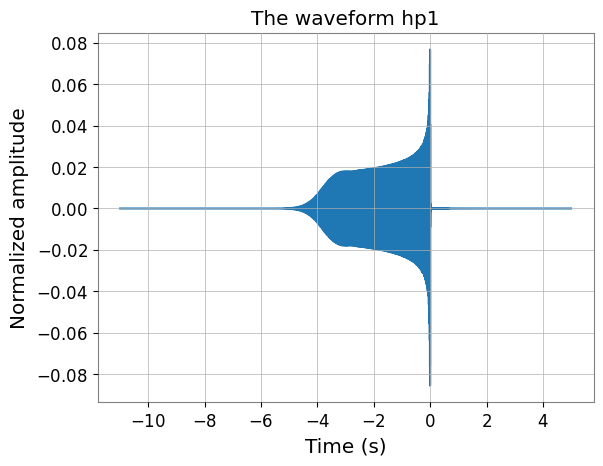

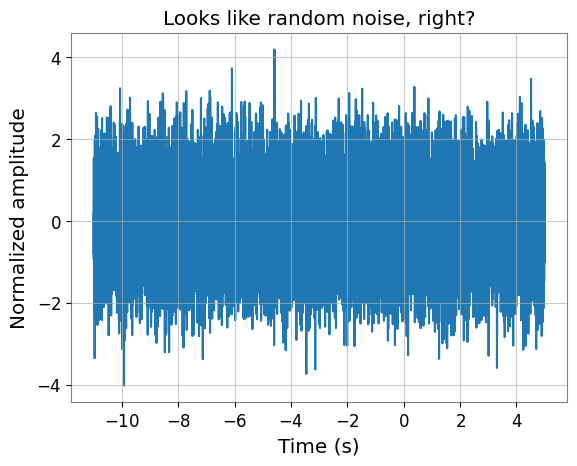

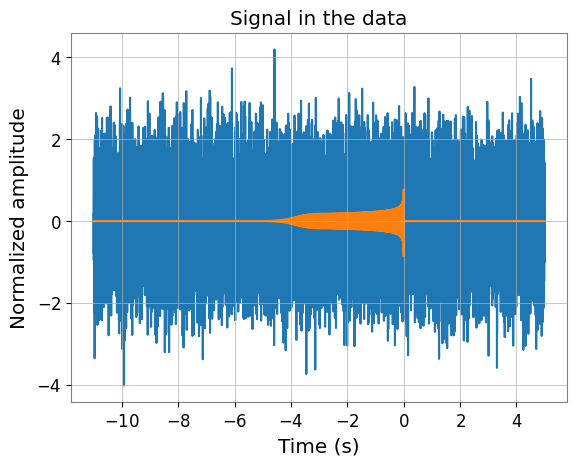

In [ ]:
# note that in this figure, the waveform amplitude is of order 1.
# The duration (for frequency above f_lower=25 Hz) is only 3 or 4 seconds long.
# The waveform is "tapered": slowly ramped up from zero to full strength, over the first second or so.
# It is zero-padded at earlier times.
pylab.figure()
pylab.title("The waveform hp1")
pylab.plot(hp1.sample_times, hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

# Shift the waveform to start at a random time in the Gaussian noise data.
waveform_start = numpy.random.randint(0, len(data) - len(hp1))
data[waveform_start:waveform_start+len(hp1)] += 10 * hp1.numpy()

pylab.figure()
pylab.title("Looks like random noise, right?")
pylab.plot(hp1.sample_times, data[waveform_start:waveform_start+len(hp1)])
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

pylab.figure()
pylab.title("Signal in the data")
pylab.plot(hp1.sample_times, data[waveform_start:waveform_start+len(hp1)])
pylab.plot(hp1.sample_times, 10 * hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

To search for this signal we can cross-correlate the signal with the entire dataset -> Not in any way optimized at this point, just showing the method.

We will do the cross-correlation in the time domain, once for each time step. It runs slowly...

Text(0, 0.5, 'Cross-correlation')

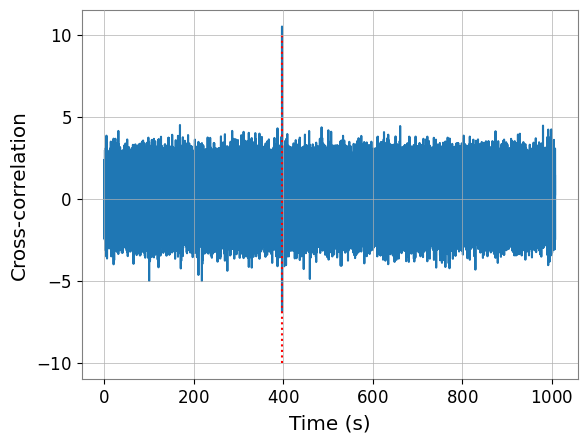

In [ ]:
cross_correlation = numpy.zeros([len(data)-len(hp1)])
hp1_numpy = hp1.numpy()
for i in range(len(data) - len(hp1_numpy)):
    cross_correlation[i] = (hp1_numpy * data[i:i+len(hp1_numpy)]).sum()

# plot the cross-correlated data vs time. Superimpose the location of the end of the signal;
# this is where we should find a peak in the cross-correlation.
pylab.figure()
times = numpy.arange(len(data) - len(hp1_numpy)) / float(sample_rate)
pylab.plot(times, cross_correlation)
pylab.plot([waveform_start/float(sample_rate), waveform_start/float(sample_rate)], [-10,10],'r:')
pylab.xlabel('Time (s)')
pylab.ylabel('Cross-correlation')

Here you can see that the largest spike from the cross-correlation comes at the time of the signal. We only really need one more ingredient to describe matched-filtering: "Colored" noise (Gaussian noise but with a frequency-dependent variance; white noise has frequency-independent variance).

Let's repeat the process, but generate a stretch of data colored with LIGO's zero-detuned--high-power noise curve. We'll use a PyCBC library to do this.

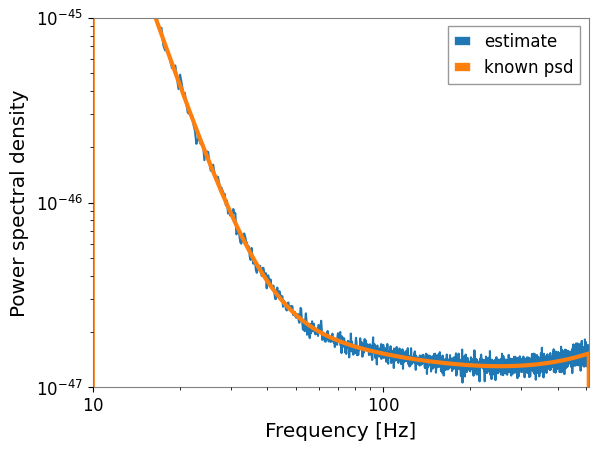

In [ ]:
# http://pycbc.org/pycbc/latest/html/noise.html
import pycbc.noise
import pycbc.psd

# The color of the noise matches a PSD which you provide:
# Generate a PSD matching Advanced LIGO's zero-detuned--high-power noise curve
flow = 10.0
delta_f = 1.0 / 128
flen = int(sample_rate / (2 * delta_f)) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate colored noise
delta_t = 1.0 / sample_rate
ts = pycbc.noise.noise_from_psd(data_length*sample_rate, delta_t, psd, seed=127)

# Estimate the amplitude spectral density (ASD = sqrt(PSD)) for the noisy data
# using the "welch" method. We'll choose 4 seconds PSD samples that are overlapped 50%
seg_len = int(4 / delta_t)
seg_stride = int(seg_len / 2)
estimated_psd = pycbc.psd.welch(ts,seg_len=seg_len,seg_stride=seg_stride)

# plot it:
pylab.loglog(estimated_psd.sample_frequencies, estimated_psd, label='estimate')
pylab.loglog(psd.sample_frequencies, psd, linewidth=3, label='known psd')
pylab.xlim(xmin=flow, xmax=512)
pylab.ylim(1e-47, 1e-45)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density')
pylab.legend()
pylab.grid()
pylab.show()

# add the signal, this time, with a "typical" amplitude.
ts[waveform_start:waveform_start+len(hp1)] += hp1.numpy() * 1E-20

Then all we need to do is to "whiten" both the data, and the template waveform. This can be done, in the frequency domain, by dividing by the PSD. This *can* be done in the time domain as well, but it's more intuitive in the frequency domain

In [ ]:
# Generate a PSD for whitening the data
from pycbc.types import TimeSeries

# The PSD, sampled properly for the noisy data
flow = 10.0
delta_f = 1.0 / data_length
flen = int(sample_rate / (2 * delta_f)) + 1
psd_td = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, 0)

# The PSD, sampled properly for the signal
delta_f = sample_rate / float(len(hp1))
flen = int(sample_rate / (2 * delta_f)) + 1
psd_hp1 = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, 0)

# The 0th and Nth values are zero. Set them to a nearby value to avoid dividing by zero.
psd_td[0] = psd_td[1]
psd_td[len(psd_td) - 1] = psd_td[len(psd_td) - 2]
# Same, for the PSD sampled for the signal
psd_hp1[0] = psd_hp1[1]
psd_hp1[len(psd_hp1) - 1] = psd_hp1[len(psd_hp1) - 2]

# convert both noisy data and the signal to frequency domain,
# and divide each by ASD=PSD**0.5, then convert back to time domain.
# This "whitens" the data and the signal template.
# Multiplying the signal template by 1E-21 puts it into realistic units of strain.
data_whitened = (ts.to_frequencyseries() / psd_td**0.5).to_timeseries()
hp1_whitened = (hp1.to_frequencyseries() / psd_hp1**0.5).to_timeseries() * 1E-21

Text(0, 0.5, 'Cross-correlation')

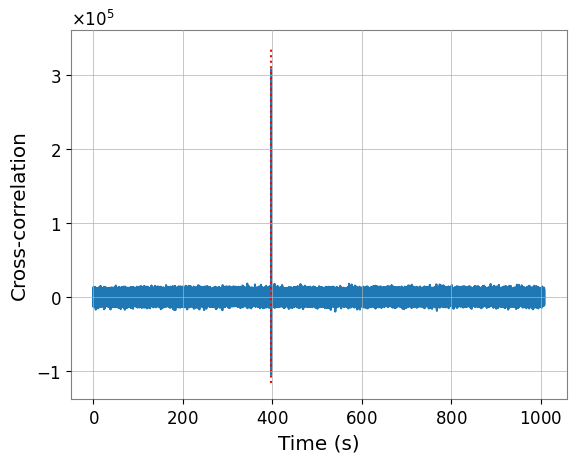

In [ ]:
# Now let's re-do the correlation, in the time domain, but with whitened data and template.
cross_correlation = numpy.zeros([len(data)-len(hp1)])
hp1n = hp1_whitened.numpy()
datan = data_whitened.numpy()
for i in range(len(datan) - len(hp1n)):
    cross_correlation[i] = (hp1n * datan[i:i+len(hp1n)]).sum()

# plot the cross-correlation in the time domain. Superimpose the location of the end of the signal.
# Note how much bigger the cross-correlation peak is, relative to the noise level,
# compared with the unwhitened version of the same quantity. SNR is much higher!
pylab.figure()
times = numpy.arange(len(datan) - len(hp1n)) / float(sample_rate)
pylab.plot(times, cross_correlation)
pylab.plot([waveform_start/float(sample_rate), waveform_start/float(sample_rate)],
           [(min(cross_correlation))*1.1,(max(cross_correlation))*1.1],'r:')
pylab.xlabel('Time (s)')
pylab.ylabel('Cross-correlation')

# Challenge!

* Histogram the whitened time series. Ignoring the outliers associated with the signal, is it a Gaussian? What is the mean and standard deviation? (We have not been careful in normalizing the whitened data properly).
* Histogram the above cross-correlation time series. Ignoring the outliers associated with the signal, is it a Gaussian? What is the mean and standard deviation?
* Find the location of the peak. (Note that here, it can be positive or negative), and the value of the SNR of the signal (which is the absolute value of the peak value, divided by the standard deviation of the cross-correlation time series).

<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop #4


## Tutorial 2.2 PyCBC Tutorial, Matched Filtering in Action

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data

In this tutorial we will walk through how find a specific signal in LIGO data. We present matched filtering in PyCBC, which is optimal in the case of Gaussian noise and a known signal model. In reality our noise is not entirely Guassian, and in practice we use a variety of techniques to separate signals from noise in addition to the use of the matched filter.



### Preconditioning the Data

The purpose of preconditioning data is to reduce the dynamic range of the data and to supress low frequency behavior that can introduce numerical artefacts.
We may also wish to reduce the sample rate of the data if high frequency content is not important.

PyCBC contains an interface to the [GWOSC catalog](https://www.gw-openscience.org/eventapi/), so you can easily access the data and parameters of the published gravitational-wave signals.

In [ ]:
strain = merger.strain('H1')

In [ ]:
type(strain)

pycbc.types.timeseries.TimeSeries

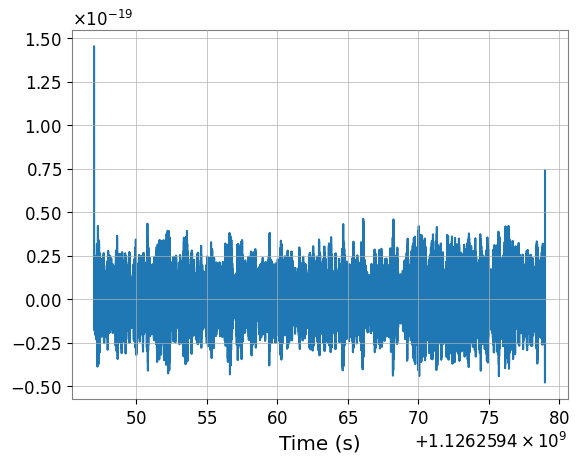

In [ ]:
%matplotlib inline

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

# As an example we use the GW150914 data
merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()


### Filter Wraparound

Note the spike in the data at the boundaries. This is caused by the highpass and resampling stages filtering the data. When the filter is applied to the boundaries, it wraps around to the beginning of the data. Since the data itself has a discontinuity (i.e. it is not cyclic) the filter itself will ring off for a time up to the length of the filter.

Even if a visible transient is not seen, we want to avoid filters that act on times which are not causally connected. To avoid this, we trim the ends of the data sufficiently to ensure that they do not wrap around the input. We will enforce this requirement in all steps of our filtering.

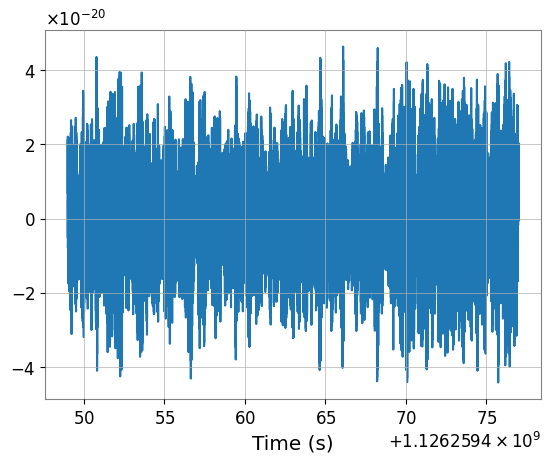

In [ ]:
# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

### Calculate the Power Spectral Density

Optimal matched filtering requires weighting the frequency components of the potential signal and data by the noise amplitude. We can view this as filtering the data with the time series equivalent of 1 / PSD. To ensure that we can control the effective length of the filter, we window the time domain equivalent of the PSD to a specific length. This has the effect of losing some information about line behavior in the detector. However, since our signals span a large frequency range, and lines are narrow, this is a negligible effect.

**Important note:** Computing a PSD from data that might contain signals, non-Gaussianities and non-stationarities is not trivial. In this example we use Welch's method to obtain a PSD estimate. PyCBC's PSD module contains tools for measuring PSDs, or directly using pre-generated PSDs.

In [ ]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency.
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

### Make your Signal Model

Conceptually, matched filtering involves laying the potential signal over your data and integrating (after weighting frequencies correctly).
If there is a signal in the data that aligns with your "template", you will get a large value when integrated over.

In this case we "know" what the signal parameters are. In a real search we would grid over the parameters and calculate the SNR time series for each one.

We will assume equal masses, and non-rotating black holes which is within the posterior probability of GW150914.

In [ ]:
from pycbc.waveform import get_td_waveform

m = 36 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

The waveform begins at the start of the vector, so if we want the SNR time series to correspond to the approximate merger location, we need to shift the data so that the merger is approximately at the first bin of the data.

The `cyclic_time_shift` method shifts the timeseries by a given amount of time.
It treats the data as if it were on a ring so points shifted off the end of the series reappear at the start.

Note that time stamps are *not* in general affected (as the start time of the full array is shifted), but the index of each point in the vector is.

By convention, waveforms returned from `get_td_waveform` have their merger stamped with time zero, so we can use the start time to shift the merger into position.

Text(0, 0.5, 'Strain')

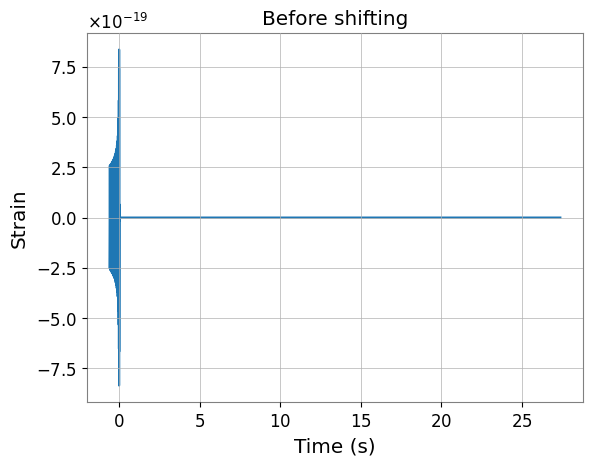

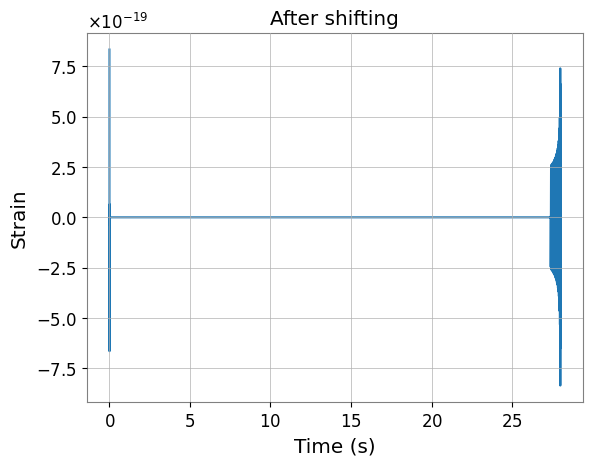

In [ ]:
# Let's plot the signal before and after shifting

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

### Calculating the Signal-to-Noise Time Series

In this section we will calculate the signal-to-noise time series for our template.
We'll take care to handle issues of filter corruption / wraparound by truncating the output time series.
We need to account for both the length of the template and 1 / PSD.

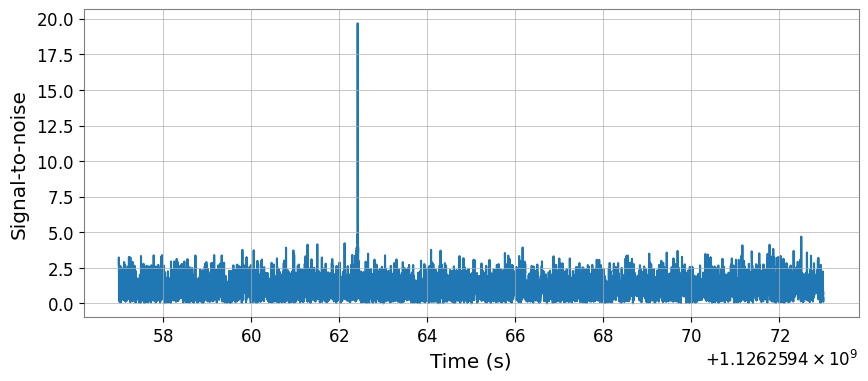

We found a signal at 1126259462.4248047s with SNR 19.677873025893277


In [ ]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for
# so short a template). A longer signal such as from a BNS, would
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why are we taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

## Aligning and Subtracting the Proposed Signal

In the previous section we found a peak in the signal-to-noise for a proposed binary black hole merger.
We can use this SNR peak to align our proposal to the data, and to also subtract our proposal from the data.

In [ ]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

### Visualize the Overlap Between the Signal and Data

To compare the data an signal on equal footing, and to concentrate on the frequency range that is important. We will whiten both the template and the data, and then bandpass both the data and template between 30-300 Hz. In this way, any signal that is in the data is transformed in the same way that the template is.

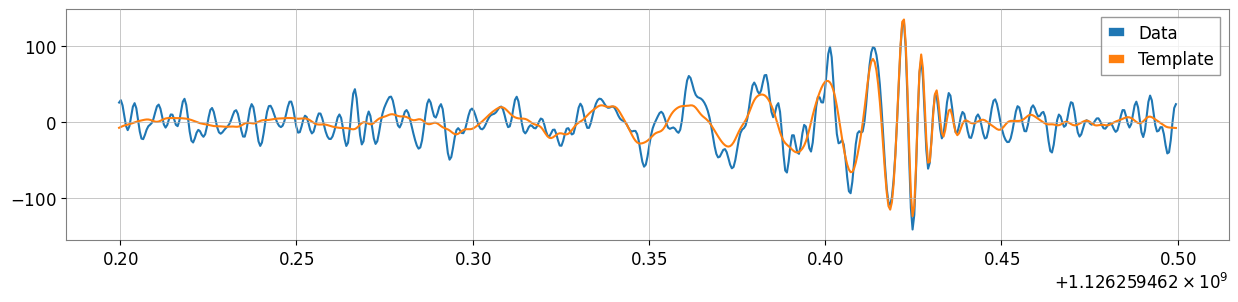

In [ ]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()
white_template = (aligned.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()

### Subtracting the Signal from the Data

Now that we've aligned the template we can simply subtract it. Let's see below how that looks in the time-frequency plots!

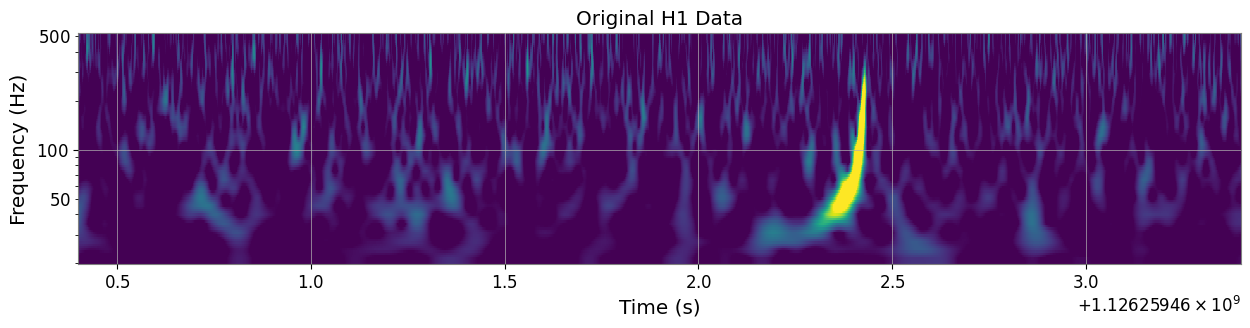

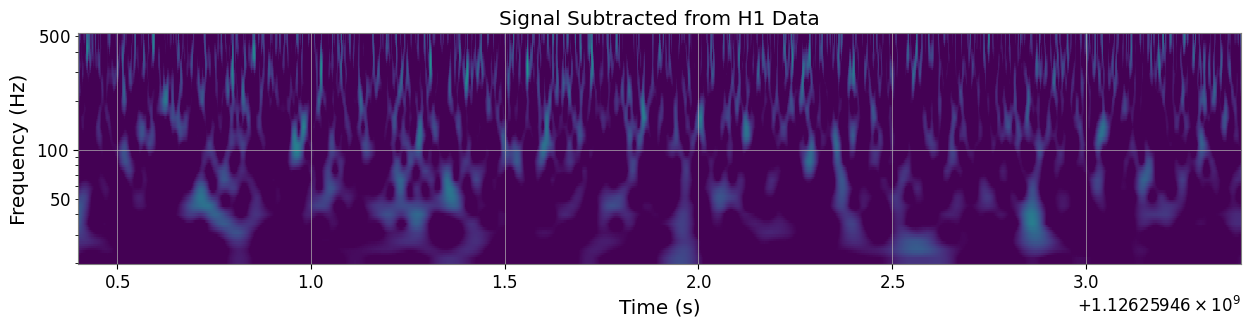

In [ ]:
subtracted = conditioned - aligned

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001, logfsteps=100, qrange=(8, 8), frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(merger.time - 2, merger.time + 1)
    pylab.show()

## Challenge!

Use the methods demonstrated above to see if you can calculate the SNR
time series in the following data sets. What is the SNR of each signal?
Which template matched best to which data?

Information that may be useful:

* Signals are all placed between 100 and 120 seconds into the frame file.
* You may assume mass1 = mass2 (equal mass) and that each component mass is one of 15, 30, or 45.
* Each file starts at gps time 0, and ends at gps time 128
* The channel name in each file is "H1:TEST-STRAIN"

In [ ]:
# Download the challenge set files
from pycbc.frame import read_frame
import urllib

def get_file(fname):
    url = "https://github.com/gw-odw/odw-2020/raw/master/Data/{}"
    url = url.format(fname)
    urllib.request.urlretrieve(url, fname)
    print('Getting : {}'.format(url))

files = ['PyCBC_T2_0.gwf', 'PyCBC_T2_1.gwf', 'PyCBC_T2_2.gwf']

for fname in files:
    get_file(fname)


# An example of how to read the data from these files:
file_name = "PyCBC_T2_0.gwf"

# LOSC bulk data typically uses the same convention for internal channels names
# Strain is typically IFO:LOSC-STRAIN, where IFO can be H1/L1/V1.
channel_name = "H1:TEST-STRAIN"

start = 0
end = start + 128

ts = read_frame(file_name, channel_name, start, end)


Getting : https://github.com/gw-odw/odw-2020/raw/master/Data/PyCBC_T2_0.gwf
Getting : https://github.com/gw-odw/odw-2020/raw/master/Data/PyCBC_T2_1.gwf
Getting : https://github.com/gw-odw/odw-2020/raw/master/Data/PyCBC_T2_2.gwf
